In [94]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')


In [95]:
df=pd.read_csv("medical_insurance.csv")

In [96]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
df.shape

(2772, 7)

In [149]:
df[df['age']==22]

,age,sex,bmi,children,smoker,region,charges
30,22,1,35.600,0,1,1,35585.57600
78,22,0,39.805,0,0,4,2755.02095
82,22,1,37.620,1,1,2,37165.16380
135,22,0,28.050,0,0,2,2155.68150
137,22,1,25.175,0,0,3,2045.68525
139,22,0,36.000,0,0,1,2166.73200
182,22,1,19.950,3,0,4,4005.42250
277,22,0,24.300,0,0,1,2150.46900
293,22,0,28.820,0,0,2,2156.75180
436,22,1,31.730,0,0,4,2254.79670


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [100]:
df.describe(include="O")

,sex,smoker,region
count,2772,2772,2772
unique,2,2,4
top,male,no,southeast
freq,1406,2208,766


In [101]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [102]:
df.duplicated().sum()

1435

### Data Cleaning

In [103]:
df.drop_duplicates(inplace=True,ignore_index=True)
df.duplicated().sum()

0

In [104]:
df.shape

(1337, 7)

In [105]:
for i in df.select_dtypes(include="object"):
    print ([i])
    print(df[i].nunique())
    print(df[i].unique(),"\n","="*100)
    

['sex']
2
['female' 'male'] 
['smoker']
2
['yes' 'no'] 
['region']
4
['southwest' 'southeast' 'northwest' 'northeast'] 


In [106]:
for i in df.select_dtypes(include="object"):
    print ([i])
    print(df[i].nunique())
    print(df[i].value_counts(),"\n","="*100)

['sex']
2
sex
male      675
female    662
Name: count, dtype: int64 
['smoker']
2
smoker
no     1063
yes     274
Name: count, dtype: int64 
['region']
4
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64 


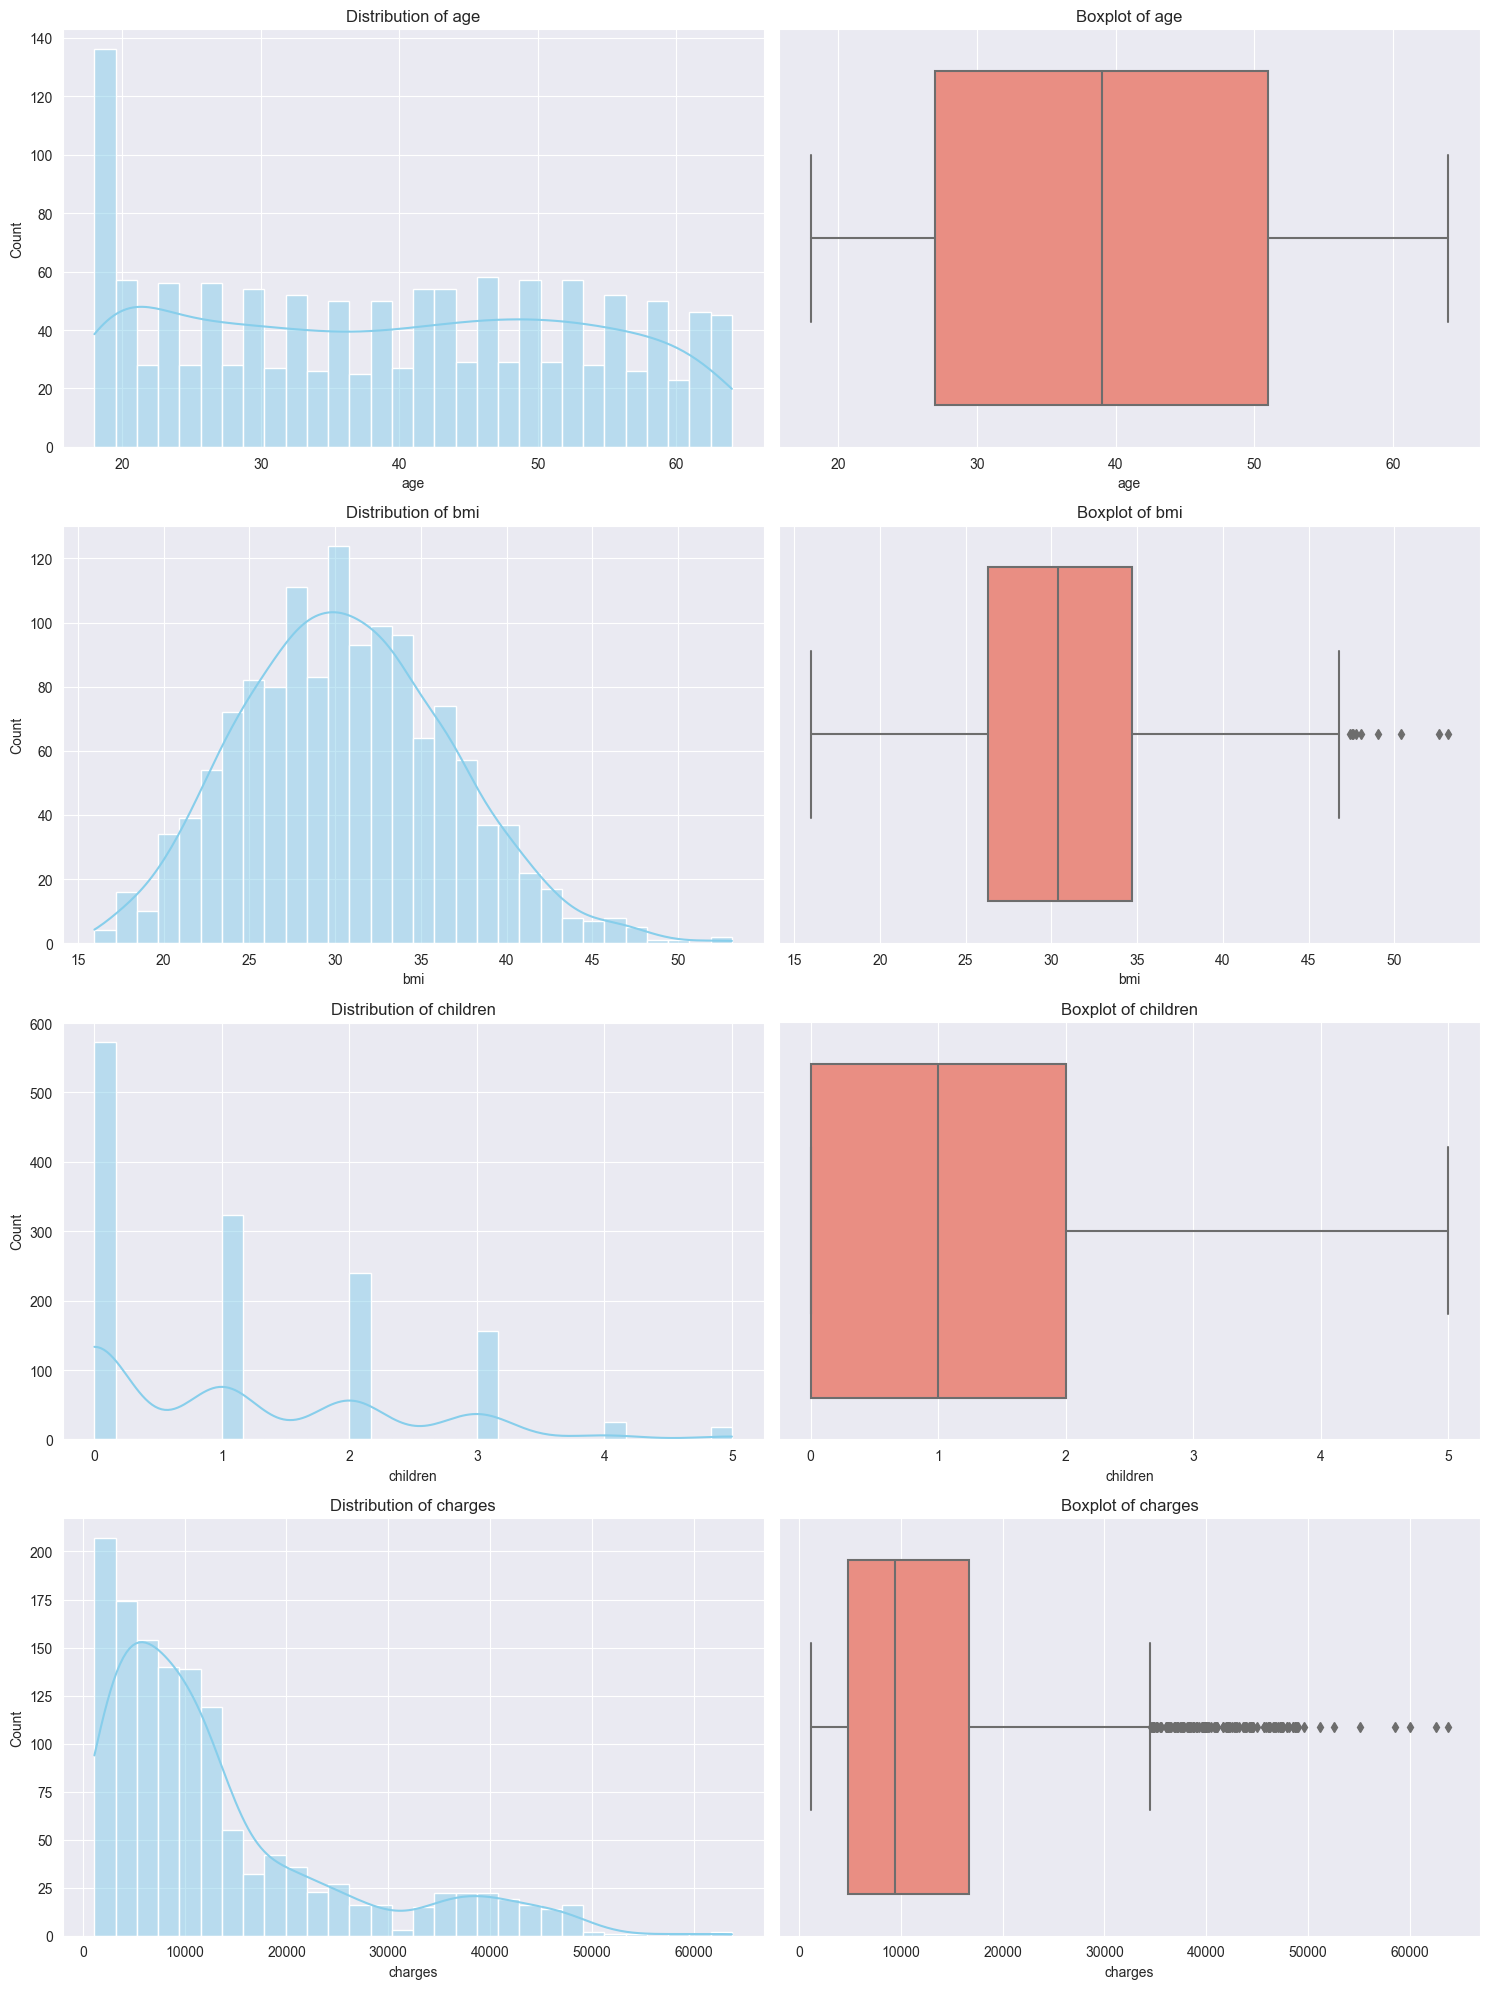

In [107]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = len(numerical_cols)

plt.figure(figsize=(15, 5 * n_cols))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_cols, 2, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    
    plt.subplot(n_cols, 2, 2*i + 2)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### Data Analysis

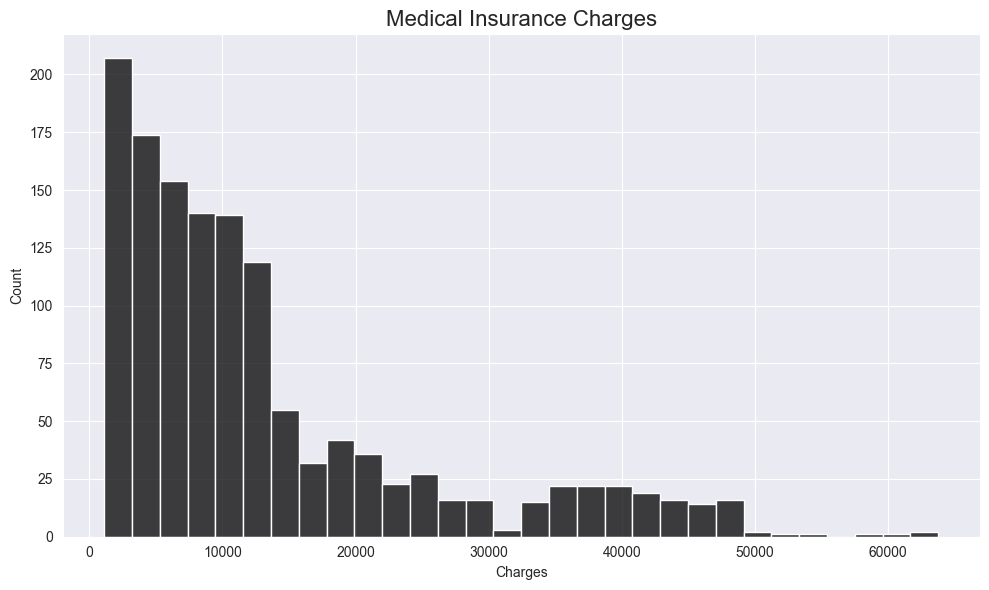

In [108]:


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="charges", color='black', bins=30)  
plt.title("Medical Insurance Charges", fontsize=16)
plt.xlabel("Charges")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


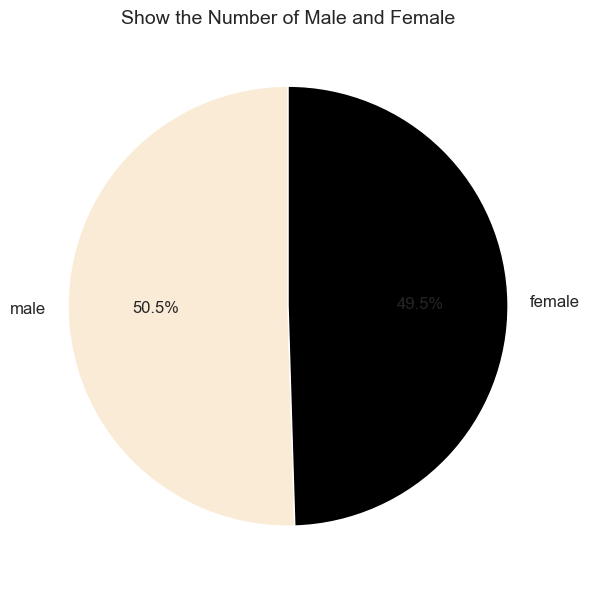

In [109]:
import matplotlib.pyplot as plt

sex_counts = df['sex'].value_counts()


labels = sex_counts.index
sizes = sex_counts.values
colors = ['antiquewhite', 'black']  

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title("Show the Number of Male and Female", fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()


In [110]:
sex_charge=df.groupby(["sex"])["charges"].max().sort_values(ascending=False).reset_index()
sex_charge

,sex,charges
0,female,63770.42801
1,male,62592.87309


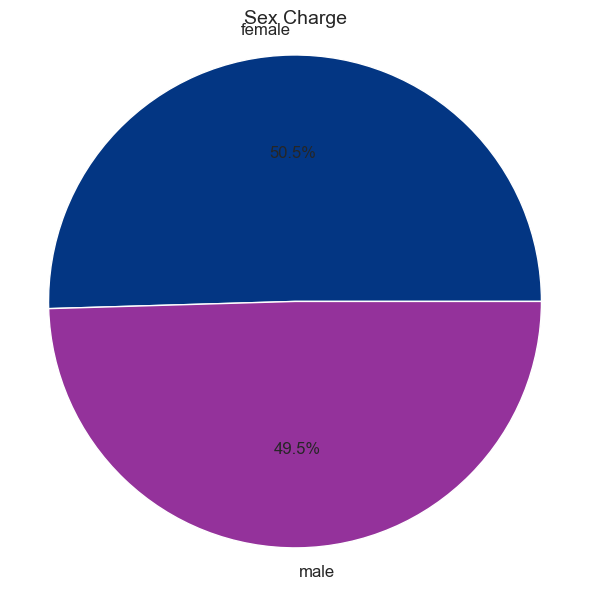

In [111]:
sex_charge = df.groupby("sex")["charges"].max().sort_values(ascending=False).reset_index()

labels = sex_charge["sex"]
sizes = sex_charge["charges"]
colors = ["#033683", "#94329B"]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    
    textprops={'fontsize': 12}
)
plt.title("Sex Charge", fontsize=14)
plt.axis("equal")  
plt.tight_layout()
plt.show()


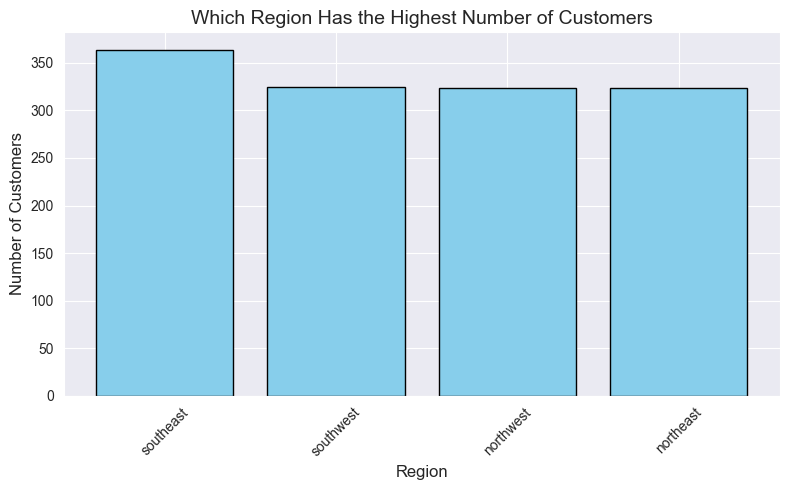

In [112]:
region = df["region"].value_counts().sort_values(ascending=False).reset_index()
region.columns = ["region", "count"] 

plt.figure(figsize=(8, 5))
plt.bar(region["region"], region["count"], color="skyblue", edgecolor="black")

plt.title("Which Region Has the Highest Number of Customers", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [113]:
region_charge=df.groupby(["region"])["charges"].sum().sort_values(ascending=False).reset_index()

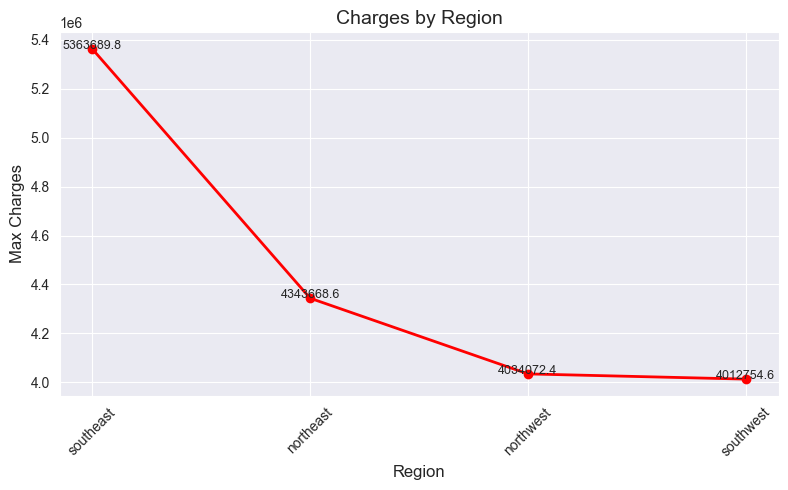

In [114]:
plt.figure(figsize=(8, 5))
plt.plot(region_charge["region"], region_charge["charges"], marker='o', color='red', linewidth=2)

for i, txt in enumerate(region_charge["charges"]):
    plt.text(region_charge["region"].iloc[i], txt + 500, round(txt, 1), ha='center', fontsize=9)

plt.title("Charges by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Max Charges", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [115]:
agee=df.groupby(["age"])["charges"].max().sort_values().reset_index()
agee

,age,charges
0,21,26018.95052
1,26,36085.21900
2,32,37607.52770
3,24,38126.24650
4,20,38344.56600
5,18,38792.68560
6,27,39611.75770
7,19,39722.74620
8,49,39727.61400
9,35,39983.42595


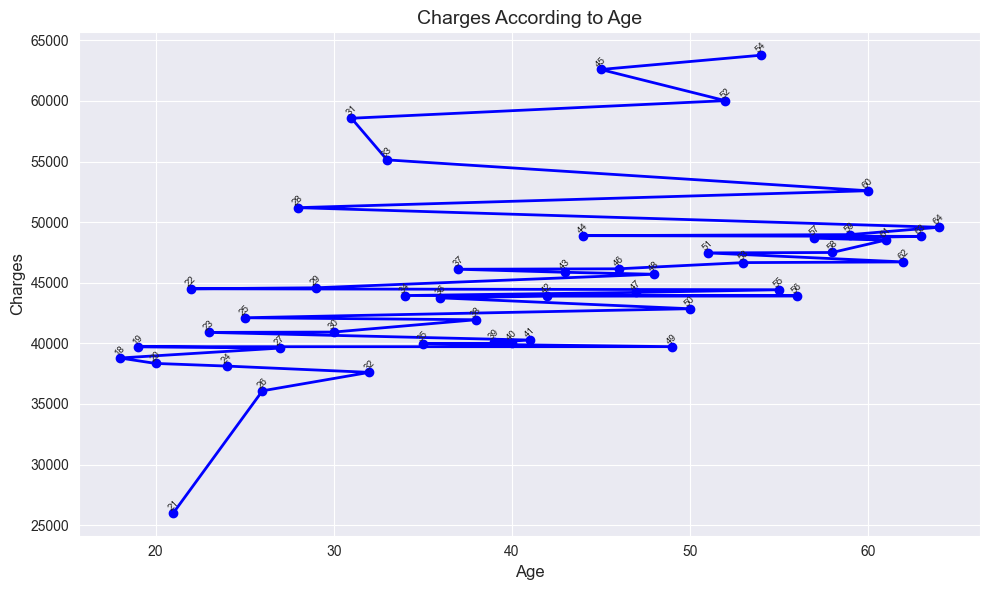

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(agee["age"], agee["charges"], color='blue', marker='o', linestyle='-', linewidth=2)

for i in range(len(agee)):
    plt.text(agee["age"].iloc[i], agee["charges"].iloc[i] + 200, str(agee["age"].iloc[i]), 
             ha='center', fontsize=7, rotation=45)

plt.title("Charges According to Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
smokerr=df.groupby(["smoker"])["charges"].max().sort_values(ascending=False).reset_index()
smokerr

,smoker,charges
0,yes,63770.42801
1,no,36910.60803


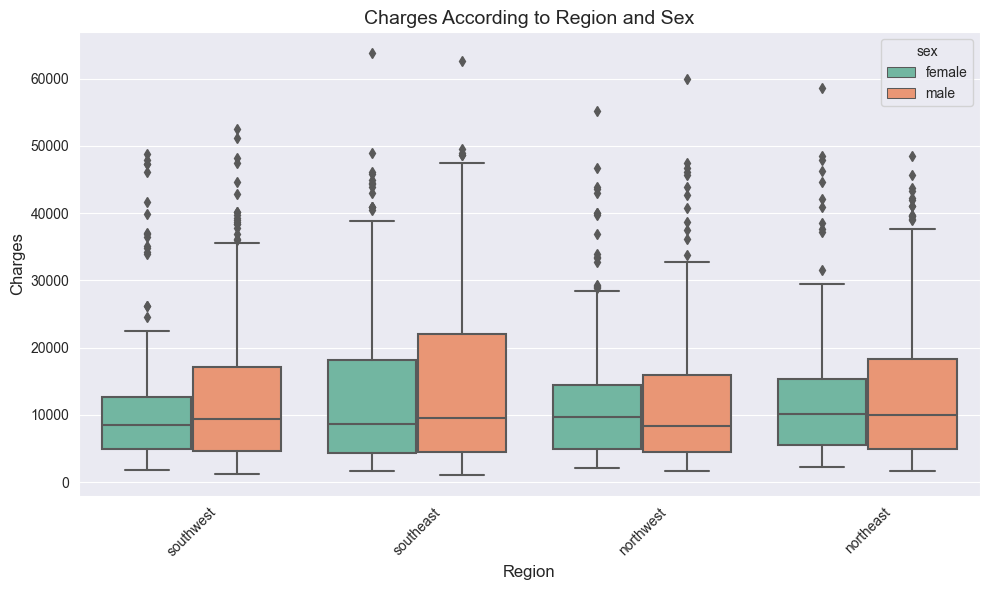

In [118]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="region", y="charges", hue="sex", palette="Set2")

plt.title("Charges According to Region and Sex", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


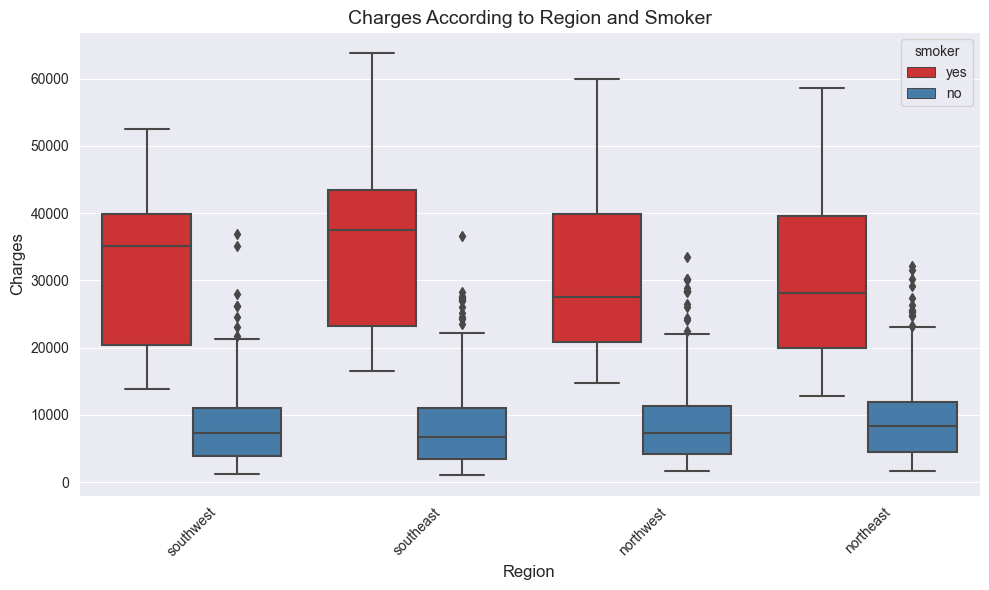

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="region", y="charges", hue="smoker", palette="Set1")

plt.title("Charges According to Region and Smoker", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


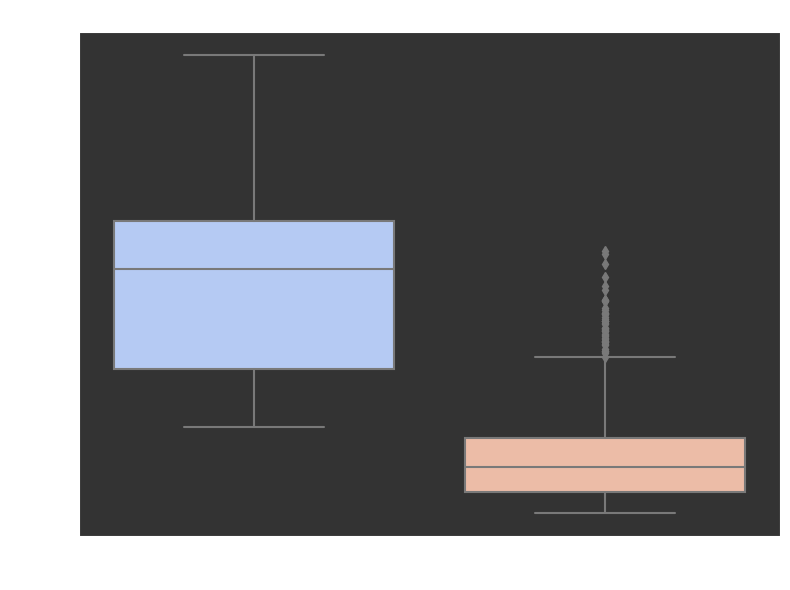

In [120]:
plt.figure(figsize=(8, 6))
sns.set_style("dark")  
sns.boxplot(data=df, x="smoker", y="charges", palette="coolwarm")

plt.title("Charges According to Smokers", fontsize=14, color='white')
plt.xlabel("Smoker", fontsize=12, color='white')
plt.ylabel("Charges", fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor("#333")  
plt.tight_layout()
plt.show()


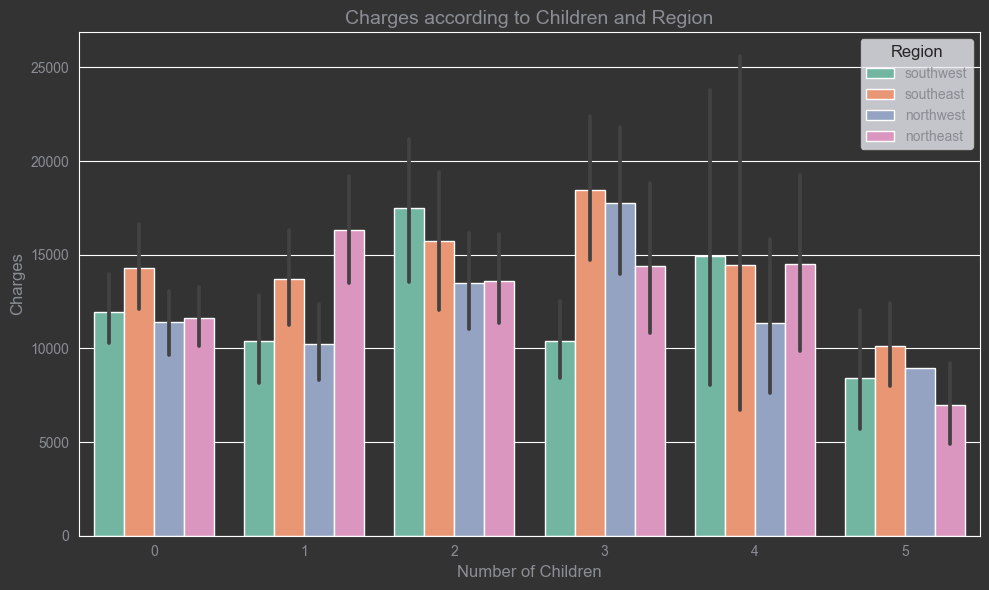

In [121]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")


sns.barplot(data=df, x="children", y="charges", hue="region", palette="Set2")

plt.title("Charges according to Children and Region", fontsize=14, color='#8a8d93')
plt.xlabel("Number of Children", fontsize=12, color='#8a8d93')
plt.ylabel("Charges", fontsize=12, color='#8a8d93')
plt.xticks(color='#8a8d93')
plt.yticks(color='#8a8d93')
plt.legend(title="Region", labelcolor='#8a8d93', title_fontsize=12)

plt.gca().set_facecolor("#333")
plt.gcf().patch.set_facecolor("#333")
plt.tight_layout()
plt.show()


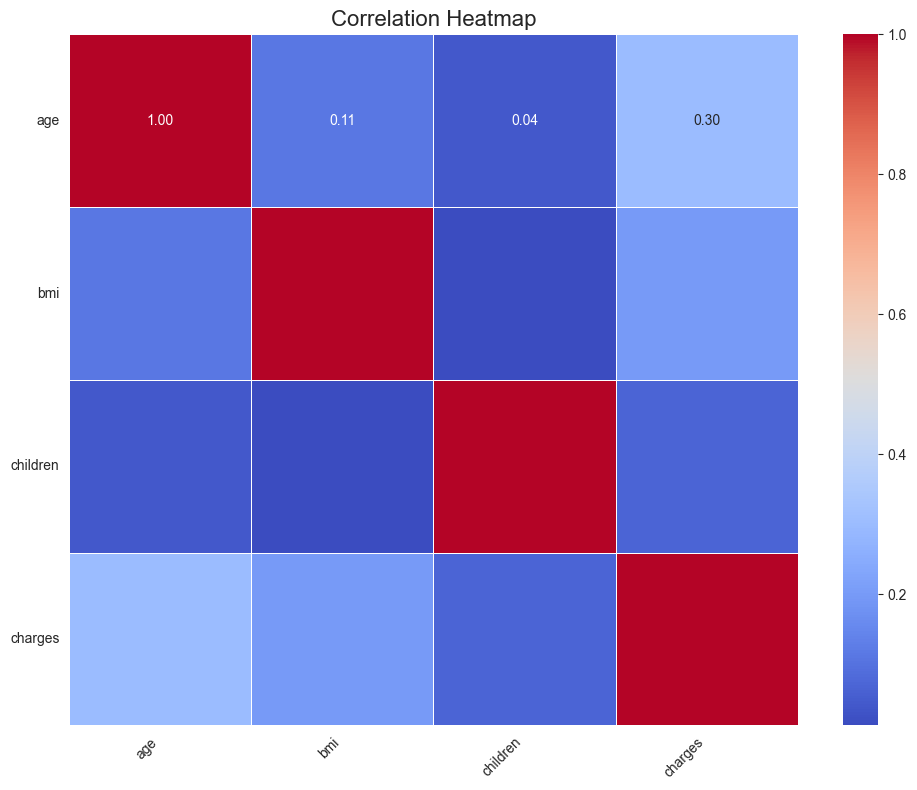

In [122]:

corrs = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corrs, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='white')

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Preprocessing

In [123]:
df["sex"]=df["sex"].map({'female':0,"male":1})
df["smoker"]=df["smoker"].map({"yes":1,"no":0})
df["region"]=df["region"].map({"southwest":1,"southeast":2,"northwest":3,"northeast":4})

In [124]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,3,10600.54830
1333,18,0,31.920,0,0,4,2205.98080
1334,18,0,36.850,0,0,2,1629.83350
1335,21,0,25.800,0,0,1,2007.94500


In [125]:
X=df.drop(["charges"],axis=1)
y=df["charges"]

### Split Data

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

standard_cols = ["age"]
robust_cols = ["bmi"]
target_col = "charges"

In [128]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [129]:
standard_scaler = StandardScaler()
X_train_scaled[standard_cols] = standard_scaler.fit_transform(X_train[standard_cols])
X_test_scaled[standard_cols] = standard_scaler.transform(X_test[standard_cols])


In [130]:
robust_scaler_X = RobustScaler()
X_train_scaled[robust_cols] = robust_scaler_X.fit_transform(X_train[robust_cols])
X_test_scaled[robust_cols] = robust_scaler_X.transform(X_test[robust_cols])

In [131]:
robust_scaler_y = RobustScaler()
y_train_scaled = robust_scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = robust_scaler_y.transform(y_test.values.reshape(-1, 1))

In [147]:
y_train_scaled

array([[-0.58904108],
       [-0.51352975],
       [ 2.06614484],
       ...,
       [-0.62589358],
       [-0.18276456],
       [-0.29508423]])

In [148]:
y_train_scaled

array([[-0.58904108],
       [-0.51352975],
       [ 2.06614484],
       ...,
       [-0.62589358],
       [-0.18276456],
       [-0.29508423]])

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

* Linear Regression

In [133]:
LinearRegressionModel  = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(LinearRegressionModel , param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

best_params = grid_search.best_params_
best_LinearRegressionModel  = grid_search.best_estimator_

train_preds = best_LinearRegressionModel .predict(X_train_scaled)
test_preds = best_LinearRegressionModel .predict(X_test_scaled)

train_score = r2_score(y_train_scaled, train_preds)
test_score = r2_score(y_test_scaled , test_preds)

print(" Best Hyperparameter", best_params)
print(" R2 Score on train", round(train_score, 4))
print(" R2 Score on test ", round(test_score, 4))


 Best Hyperparameter {'copy_X': True, 'fit_intercept': True}
 R2 Score on train 0.7297
 R2 Score on test  0.8068


* RandomForestRegrssor

In [134]:
RandomForestRegressorModel = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None] 
}


grid_search = GridSearchCV(RandomForestRegressorModel, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)


best_params = grid_search.best_params_
best_RandomForestRegressorModel = grid_search.best_estimator_

train_preds = best_RandomForestRegressorModel.predict(X_train_scaled)
test_preds = best_RandomForestRegressorModel.predict(X_test_scaled)


train_score = r2_score(y_train_scaled, train_preds)
test_score = r2_score(y_test_scaled , test_preds)

print(" Best Hyperparameter", best_params)
print(" R2 Score on train", round(train_score, 4))
print(" R2 Score on test ", round(test_score, 4))


 Best Hyperparameter {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
 R2 Score on train 0.918
 R2 Score on test  0.8808


*  DecisionTreeRegressor

In [135]:
DecisionTreeRegressorModel = DecisionTreeRegressor(random_state=33)

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeRegressorModel, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

best_params = grid_search.best_params_
best_DecisionTreeRegressorModel = grid_search.best_estimator_

train_preds = best_DecisionTreeRegressorModel.predict(X_train_scaled)
test_preds = best_DecisionTreeRegressorModel.predict(X_test_scaled)

train_score = r2_score(y_train_scaled, train_preds)
test_score = r2_score(y_test_scaled , test_preds)

print(" Best Hyperparameter", best_params)
print(" R2 Score on train", round(train_score, 4))
print(" R2 Score on test ", round(test_score, 4))


 Best Hyperparameter {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
 R2 Score on train 0.8685
 R2 Score on test  0.8924


* GradientBoostingRegressor 


In [136]:
GBRModel = GradientBoostingRegressor(random_state=33)

param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(GBRModel, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)

best_params = grid_search.best_params_
best_GBRModel = grid_search.best_estimator_

train_preds = best_GBRModel.predict(X_train_scaled)
test_preds = best_GBRModel.predict(X_test_scaled)


train_score = r2_score(y_train_scaled, train_preds)
test_score = r2_score(y_test_scaled , test_preds)

print(" Best Hyperparameter", best_params)
print(" R2 Score on train", round(train_score, 4))
print(" R2 Score on test ", round(test_score, 4))


 Best Hyperparameter {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
 R2 Score on train 0.8682
 R2 Score on test  0.8999


*using GradientBoostingRegressor because higher accuracy*

In [137]:
y_pred=best_GBRModel.predict([[22,0,33,0,0,1]])
y_pred

array([0.29298141])